# Salary Prediction using Linear Regression

In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df = pd.read_csv("Salary Data.csv", sep=',')
df

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


# EDA (Exploratory Data Analysis)

In [5]:
df.isnull().sum()

Experience Years    0
Salary              0
dtype: int64

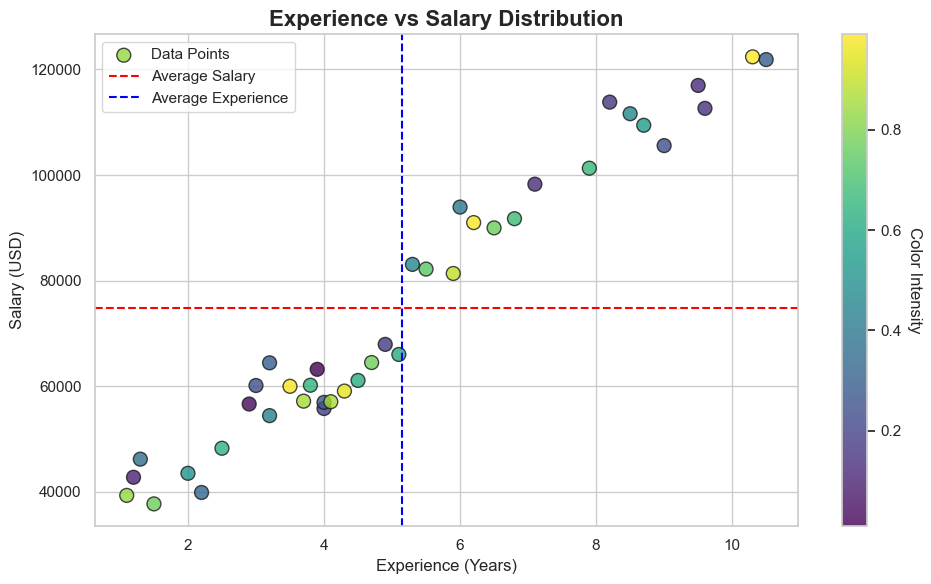

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

df['Color'] = np.random.rand(len(df))

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['Experience Years'], df['Salary'], 
    c=df['Color'], cmap='viridis', s=100, alpha=0.8, edgecolors='k', 
    label="Data Points"
)

cbar = plt.colorbar(scatter)
cbar.set_label('Color Intensity', rotation=270, labelpad=15)

plt.axhline(y=df['Salary'].mean(), color='red', linestyle='--', linewidth=1.5, label='Average Salary')
plt.axvline(x=df['Experience Years'].mean(), color='blue', linestyle='--', linewidth=1.5, label='Average Experience')

plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.title('Experience vs Salary Distribution', fontsize=16, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()


In [8]:
x= df.drop('Salary', axis=1)
x.head()

,Experience Years
0,1.1
1,1.2
2,1.3
3,1.5
4,2.0


In [9]:
y= df['Salary']
y.head()

0    39343
1    42774
2    46205
3    37731
4    43525
Name: Salary, dtype: int64

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

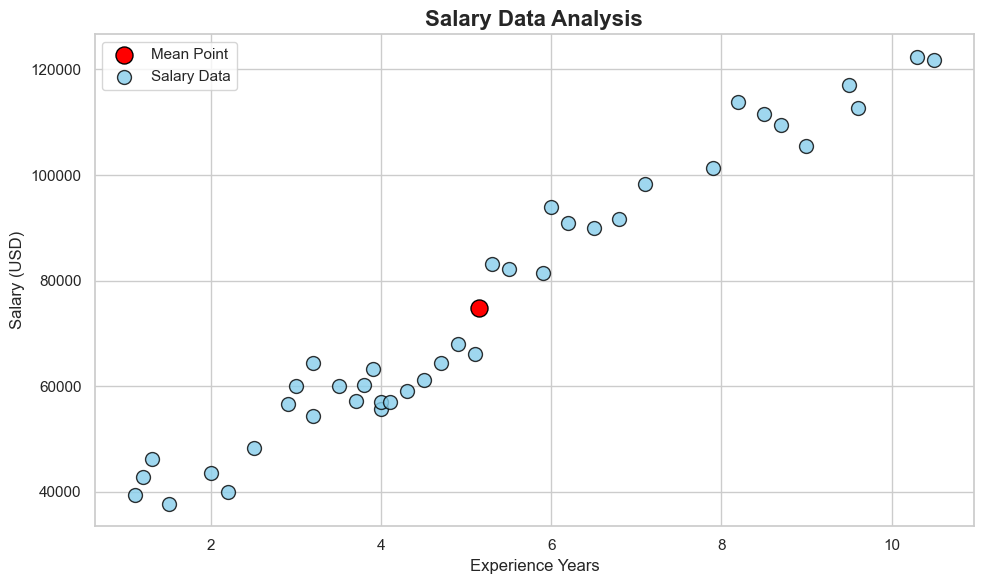

In [28]:


sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.scatter(
    x.mean(), y.mean(), 
    color='red', s=150, edgecolors='black', label='Mean Point'
)
plt.scatter(
    df['Experience Years'], df['Salary'], 
    c='skyblue', s=100, alpha=0.8, edgecolors='black', label='Salary Data'
)

plt.xlabel('Experience Years', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.title('Salary Data Analysis', fontsize=16, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()


In [12]:
reg.fit(x,y)

LinearRegression()

In [18]:
m=reg.coef_
c=reg.intercept_
m*11 + c

array([130433.17134213])

In [21]:
df['Predicted_y']=reg.predict(x)
df.head()

,Experience Years,Salary,Predicted_y
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775


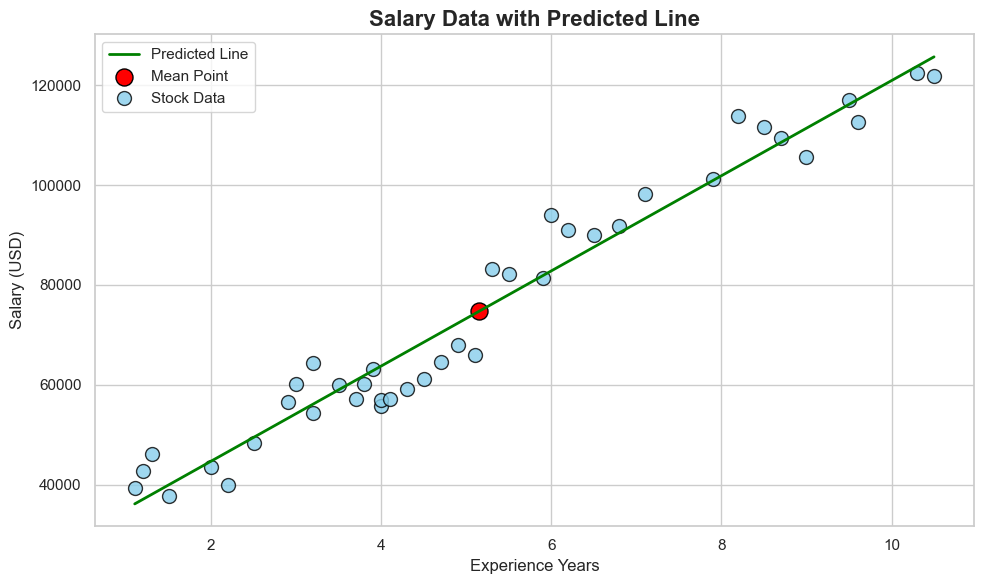

In [29]:


sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

plt.plot(
    x, reg.predict(x), 
    label='Predicted Line', color='green', linewidth=2
)
plt.scatter(
    x.mean(), y.mean(), 
    color='red', s=150, edgecolors='black', label='Mean Point'
)
plt.scatter(
    df['Experience Years'], df['Salary'], 
    c='skyblue', s=100, alpha=0.8, edgecolors='black', label='Stock Data'
)

plt.xlabel('Experience Years', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.title('Salary Data with Predicted Line', fontsize=16, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()


# Cost & Lose

In [23]:
df['lose']=df['Salary'] - df['Predicted_y']
df.head()

,Experience Years,Salary,Predicted_y,lose
0,1.1,39343,36149.031319,3193.968681
1,1.2,42774,37101.396369,5672.603631
2,1.3,46205,38053.761420,8151.238580
3,1.5,37731,39958.491522,-2227.491522
4,2.0,43525,44720.316775,-1195.316775


### Checking Perofrmance

In [24]:
reg.score(x,y)

0.9558814451799361

In [ ]:
# 95.6% Perfornce